In [1]:
from PIL import Image
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from krwordrank.word import KRWordRank
from krwordrank.word import summarize_with_keywords

# 2030 데이터로 키워드 추출

In [2]:
df = pd.read_csv('data/data2030_전처리_좋아요가중치_텍스트전처리.csv', index_col=0)
df

,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like,Weighted_comment,Comment_textPreprocessing
Title,,,,,,,,,,
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,샤인디케이,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.",2021-04-10,박시영TV,6400.0,83.0,48.0,"['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.', ...","내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다."
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,문동렬,2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...,2021-04-10,박시영TV,6400.0,83.0,37.0,['2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다...,2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다....
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,135 swan,전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...,2021-04-10,박시영TV,6400.0,83.0,34.0,['전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보...,"전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로..."
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,미루,몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...,2021-04-10,박시영TV,6400.0,83.0,67.0,['몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단...,몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진...
#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,단아란,네 죄송합니다. 삭제하겠습니다,2021-04-10,박시영TV,6400.0,83.0,34.0,"['네 죄송합니다. 삭제하겠습니다', '네 죄송합니다. 삭제하겠습니다', '네 죄송...",네 죄송합니다. 삭제하겠습니다
...,...,...,...,...,...,...,...,...,...,...
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,유창준,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.",2021-04-17,MBCNEWS,615.0,88.0,1.0,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.","간교한 인간성을 가진, 김종인, 안 띨 수를 섬기느니.. 죽는 게 낫다."
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,유정순,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,2021-04-17,MBCNEWS,615.0,88.0,0.0,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,이준석 정치 연륜이 뭐가 있다고 이렇게 나와서 이야기를 많이 하고 다니나?
"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 대한 여·야의 분석 (2021.04.12/뉴스외전/MBC)",2021-04-11,Hannah Kim,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,2021-04-17,MBCNEWS,615.0,88.0,0.0,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,준석아 주둥이 조심해라. 안철수가 할 말이 옳다. 단일화 못 했으면 오세훈 승리 없...


In [3]:
# 2030이 Title 또는 Comment_textPreprocessing에 있는 경우만 추출
df = df[['Comment_textPreprocessing']].reset_index(level=['Title'])\
.query('Title.str.contains("2030")  or Comment_textPreprocessing.str.contains("2030")',engine='python')
df

,Title,Comment_textPreprocessing
0,#139​ 민주당 지도부가 2030 마음을 얻으려면...,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다."
1,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다....
2,#139​ 민주당 지도부가 2030 마음을 얻으려면...,"전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로..."
3,#139​ 민주당 지도부가 2030 마음을 얻으려면...,몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진...
4,#139​ 민주당 지도부가 2030 마음을 얻으려면...,네 죄송합니다. 삭제하겠습니다
...,...,...
56733,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",2830 하! ㅋㅋㅋ 이게 지금 민주당 위 세대의 생각인 건가? 축하한다. 앞으로 ...
56742,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",무슨 여성이 차별받으면 5060대 지 40대는 과도 게임 혼재가 있었음 그래서 반반...
56779,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",남자들의 인권 주장 지질함 여성들의 인권 주장 평등 실현 죄송한데 민주당 의원님 말...
56816,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",차별은 어머니 세대들이 다 당했는데.. 한 번도 사회 경험해보거나 차별받은 적도 없...


In [4]:
# [:574]부터 오류남 -> 이유&해결방안 찾기
texts = df['Comment_textPreprocessing'].tolist()[:573]
texts

['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.',
 '2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다. 2,030도 아닌 사람들이 추측해서 2030의 마음을 이야기하는 것 자체가 문제의식이 없는 것입니다. 아마추어라도 2030사람들을 몇 번이라도 불러서 보여주며 실질적인 것을 들어보는 것이 좋다고 생각해요.',
 '전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로 돌아섰죠! 20대의 경우 성격이 너무나 다르기에 초중반을 나눠서 공략해야 한다고 생각해요! 가령 20대 초반이 등록금 같은 게 문제라면 중반은 취업 후반은 자산 형성처럼 2,030대 고민 혼재 세세하게 고민하는 흔적들을 보여주는 게 중요하다고 생각합니다... 정당 색채가 엷을 때는 사소한 이유로 지지 정당이 변하는 경우가 많으니….',
 '몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진단 새겨들어야 합니다. 황희 두 임 자주 함께해서 2,030대 남성들의 마음을 얻을 방안도 모색해야 합니다. 그리고 전 국민 재난지원금 보편 지급!! 언론개혁!!',
 '네 죄송합니다. 삭제하겠습니다',
 '진짜 민주당 제대로 각성해서 대권 화끈하게 가져오자!!!',
 '당 대표 후보들이 왜 그 모양이야? ㅠㅠ',
 '말씀하신 대로 열심히 2030 관련된 정책 내고 입 안 하는 거 중요하죠. 근데 그거 못지않게 중요한 게 홍보입니다! 우리 이러 이런 거 만들었어 알아봐 줘! 가 아니라 커뮤니티 대응팀 만들어서 홍보 좀 하라고요.. 2030 들 커뮤니티 중독처럼 진짜 많이 합니다. 청와대나 당이나 홍보 마케팅 전문가 좀 잘 들여와서 커뮤니티 공략해야 합니다. 그래야 지지자들이 또 퍼 나르고 하죠.  포탈만큼 중요해요. 유튜브 SNS도 물론 적극적으로 활용하고요. 제발 법안, 정책 홍보 좀 확실하게... 진정성 있는 것도 좋은데 쇼도 필요할 때 해야죠. 커뮤니티에 관심 가지라고 꼭강에 말씀

In [5]:
texts

['내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.',
 '2030 마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 합니다. 2,030도 아닌 사람들이 추측해서 2030의 마음을 이야기하는 것 자체가 문제의식이 없는 것입니다. 아마추어라도 2030사람들을 몇 번이라도 불러서 보여주며 실질적인 것을 들어보는 것이 좋다고 생각해요.',
 '전 군대 전역 전까지는 보수를 지지했지만, 대학에서 양극화에 관심을 가지면서 진보로 돌아섰죠! 20대의 경우 성격이 너무나 다르기에 초중반을 나눠서 공략해야 한다고 생각해요! 가령 20대 초반이 등록금 같은 게 문제라면 중반은 취업 후반은 자산 형성처럼 2,030대 고민 혼재 세세하게 고민하는 흔적들을 보여주는 게 중요하다고 생각합니다... 정당 색채가 엷을 때는 사소한 이유로 지지 정당이 변하는 경우가 많으니….',
 '몸 안에서 무엇인가 무너져 내린 기분.. 그래도 힘내고 가야죠. 민주당은 뼈아픈 진단 새겨들어야 합니다. 황희 두 임 자주 함께해서 2,030대 남성들의 마음을 얻을 방안도 모색해야 합니다. 그리고 전 국민 재난지원금 보편 지급!! 언론개혁!!',
 '네 죄송합니다. 삭제하겠습니다',
 '진짜 민주당 제대로 각성해서 대권 화끈하게 가져오자!!!',
 '당 대표 후보들이 왜 그 모양이야? ㅠㅠ',
 '말씀하신 대로 열심히 2030 관련된 정책 내고 입 안 하는 거 중요하죠. 근데 그거 못지않게 중요한 게 홍보입니다! 우리 이러 이런 거 만들었어 알아봐 줘! 가 아니라 커뮤니티 대응팀 만들어서 홍보 좀 하라고요.. 2030 들 커뮤니티 중독처럼 진짜 많이 합니다. 청와대나 당이나 홍보 마케팅 전문가 좀 잘 들여와서 커뮤니티 공략해야 합니다. 그래야 지지자들이 또 퍼 나르고 하죠.  포탈만큼 중요해요. 유튜브 SNS도 물론 적극적으로 활용하고요. 제발 법안, 정책 홍보 좀 확실하게... 진정성 있는 것도 좋은데 쇼도 필요할 때 해야죠. 커뮤니티에 관심 가지라고 꼭강에 말씀

In [6]:
# 불용어 제거
with open('data/stopwords.txt') as fp :
    stopwords = fp.readlines()

stopwords = set([x.strip() for x in stopwords])

In [7]:
keywords = summarize_with_keywords(texts, min_count=5, max_length=10,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
keywords = summarize_with_keywords(texts) # with default arguments

scan vocabs ... 
num vocabs = 2325
done = 10


In [8]:
passwords = {word:score for word, score in sorted(
    keywords.items(), key=lambda x:-x[1])[:300] if not (word in stopwords)}
passwords

{'언론': 6.864043941354868,
 '20대': 6.2436735937974275,
 '초선': 4.868058846798261,
 '개혁': 4.532664441870059,
 '선거': 4.24420710475687,
 '부동산': 4.229465868259253,
 '국민': 4.099818225247319,
 '박시영': 4.0233948569842175,
 '페미': 3.961286424306413,
 '지금': 3.7123994714928656,
 '문제': 3.413521392370388,
 '사람': 3.100875836079936,
 '의원': 3.0434542165347453,
 '대선': 2.9609835548807175,
 '남성': 2.8156953807306073,
 '검찰': 2.7461087661670116,
 '180석': 2.635974141140691,
 '정책': 2.559791382749014,
 '생각': 2.5299832188149463,
 '여성': 2.5080129616128146,
 '정부': 2.3979194798380123,
 '진보': 2.3947676165548173,
 '안진걸': 2.3726136581345183,
 '청년': 2.339790485719788,
 '정신': 2.3276890570734508,
 '지지': 2.27209651089876,
 '대통령': 2.1537141828458033,
 '포털': 1.984587220126488,
 '말고': 1.9755483686606112,
 '많이': 1.9216424802358918,
 '조국': 1.9104498946105095,
 '대표': 1.9070908680837086,
 '대한': 1.9017067735982889,
 '남자': 1.8878599106097629,
 '정치': 1.874788476818388,
 '보고': 1.7519048990978243,
 '방송': 1.7198880907915095,
 '이삼십대': 1.

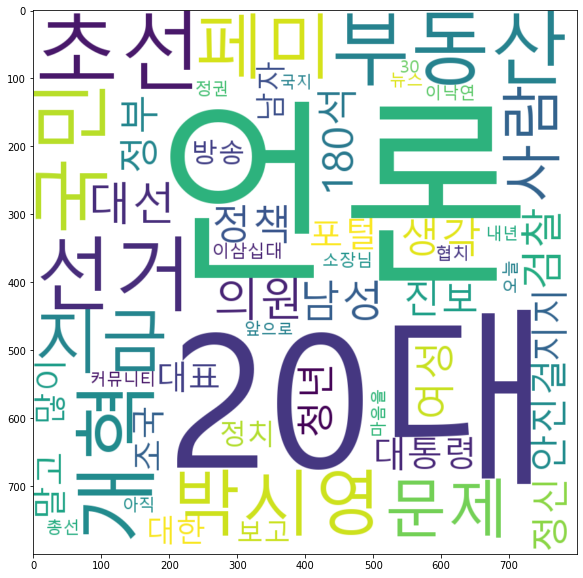

In [9]:
font_path = "c:/Windows/Fonts/malgun.ttf"
krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(passwords)

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

# wordcloud 불용어 있으면 불용어 사전에 추가하기

In [10]:
# f = open("data/stopwords.txt",'a')
# for t in stopwords:
#     f.write(t+'\n')
# f.close()

In [11]:
# f = open("data/stopwords.txt",'a')
# f.write('됩니다.\n')
# f.write('합니다.\n')
# f.write('것이\n')
# f.write('입니다.\n')
# f.write('있습니다.\n')
# f.write('이렇게.\n')
# f.write('한다.\n')
# f.write('겁니다.\n')
# f.write('민주당\n')
# f.write('오세훈\n')
# f.write('문재인\n')
# f.write('것을\n')
# f.write('이렇게\n')
# f.write('너무\n')
# f.write('가지고\n')
# f.close()

# 핵심 문장 추출

In [12]:
from krwordrank.sentence import summarize_with_sentences

# 불용어 처리 X 버전
keywords, sents = summarize_with_sentences(texts, num_keywords=1000, num_keysents=300)
print(len(keywords)) # 최대 키워드개수가 726
print(keywords, sents)

726
{'민주당': 14.218356693942392, '언론': 6.864043941354868, '20대': 6.2436735937974275, '초선': 4.868058846798261, '개혁': 4.532664441870059, '있는': 4.507582850479955, '하는': 4.322792286962291, '선거': 4.24420710475687, '부동산': 4.229465868259253, '국민': 4.099818225247319, '박시영': 4.0233948569842175, '이번': 3.9973524990751557, '페미': 3.961286424306413, '합니다.': 3.7865275596477326, '지금': 3.7123994714928656, '이런': 3.6241437348439978, '정말': 3.596722102644373, '그리고': 3.558855136419334, '하고': 3.481657022812317, '문제': 3.413521392370388, '너무': 3.2301327747369695, '사람': 3.100875836079936, '같은': 3.091364879440247, '의원': 3.0434542165347453, '것이': 2.9991181985619066, '대선': 2.9609835548807175, '아니': 2.829593533045667, '남성': 2.8156953807306073, '검찰': 2.7461087661670116, '그런': 2.6964262075385315, '우리': 2.6695617193067576, '180석': 2.635974141140691, '그냥': 2.5799445795689286, '정책': 2.559791382749014, '생각': 2.5299832188149463, '여성': 2.5080129616128146, '제발': 2.4580313693009623, '없는': 2.4474726666780127, '정부': 2.397919479

In [13]:
# 불용어 처리 O 버전
penalty = lambda x:0 if (25 <= len(x) <= 80) else 1 # 너무 길거나 짧은 문장 제거
stopwords = stopwords

# 다양한 조건 추가 (불용어 처리 등등)
keywords, sents = summarize_with_sentences(
    texts,
    penalty=penalty,
    stopwords = stopwords,
    diversity=0.5,
    num_keywords=1000,
    num_keysents=300,
    verbose=False
)
print(len(keywords)) # 최대 키워드개수가 726
print(keywords, sents)

549
{'언론': 6.864043941354868, '20대': 6.2436735937974275, '초선': 4.868058846798261, '개혁': 4.532664441870059, '선거': 4.24420710475687, '부동산': 4.229465868259253, '국민': 4.099818225247319, '박시영': 4.0233948569842175, '페미': 3.961286424306413, '지금': 3.7123994714928656, '문제': 3.413521392370388, '사람': 3.100875836079936, '의원': 3.0434542165347453, '대선': 2.9609835548807175, '남성': 2.8156953807306073, '검찰': 2.7461087661670116, '180석': 2.635974141140691, '정책': 2.559791382749014, '생각': 2.5299832188149463, '여성': 2.5080129616128146, '정부': 2.3979194798380123, '진보': 2.3947676165548173, '안진걸': 2.3726136581345183, '청년': 2.339790485719788, '정신': 2.3276890570734508, '지지': 2.27209651089876, '대통령': 2.1537141828458033, '포털': 1.984587220126488, '말고': 1.9755483686606112, '많이': 1.9216424802358918, '조국': 1.9104498946105095, '대표': 1.9070908680837086, '대한': 1.9017067735982889, '남자': 1.8878599106097629, '정치': 1.874788476818388, '보고': 1.7519048990978243, '방송': 1.7198880907915095, '이삼십대': 1.6347729003383815, '오늘': 1.5360307

# 추출한 핵심 키워드와 핵심 문장 저장

In [14]:
print(f'핵심 키워드 개수: {len(keywords)}')
print(f'핵심 키워드 : {keywords}')

핵심 키워드 개수: 549
핵심 키워드 : {'언론': 6.864043941354868, '20대': 6.2436735937974275, '초선': 4.868058846798261, '개혁': 4.532664441870059, '선거': 4.24420710475687, '부동산': 4.229465868259253, '국민': 4.099818225247319, '박시영': 4.0233948569842175, '페미': 3.961286424306413, '지금': 3.7123994714928656, '문제': 3.413521392370388, '사람': 3.100875836079936, '의원': 3.0434542165347453, '대선': 2.9609835548807175, '남성': 2.8156953807306073, '검찰': 2.7461087661670116, '180석': 2.635974141140691, '정책': 2.559791382749014, '생각': 2.5299832188149463, '여성': 2.5080129616128146, '정부': 2.3979194798380123, '진보': 2.3947676165548173, '안진걸': 2.3726136581345183, '청년': 2.339790485719788, '정신': 2.3276890570734508, '지지': 2.27209651089876, '대통령': 2.1537141828458033, '포털': 1.984587220126488, '말고': 1.9755483686606112, '많이': 1.9216424802358918, '조국': 1.9104498946105095, '대표': 1.9070908680837086, '대한': 1.9017067735982889, '남자': 1.8878599106097629, '정치': 1.874788476818388, '보고': 1.7519048990978243, '방송': 1.7198880907915095, '이삼십대': 1.6347729003383

In [15]:
# 핵심 키워드 리스트로 저장
keywords_list = []
for k,v in keywords.items():
    keywords_list.append(k)
keywords_list = keywords_list
keywords_list

['언론',
 '20대',
 '초선',
 '개혁',
 '선거',
 '부동산',
 '국민',
 '박시영',
 '페미',
 '지금',
 '문제',
 '사람',
 '의원',
 '대선',
 '남성',
 '검찰',
 '180석',
 '정책',
 '생각',
 '여성',
 '정부',
 '진보',
 '안진걸',
 '청년',
 '정신',
 '지지',
 '대통령',
 '포털',
 '말고',
 '많이',
 '조국',
 '대표',
 '대한',
 '남자',
 '정치',
 '보고',
 '방송',
 '이삼십대',
 '오늘',
 '정권',
 '소장님',
 '총선',
 '30',
 '협치',
 '뉴스',
 '이낙연',
 '마음을',
 '커뮤니티',
 '아직',
 '앞으로',
 '국지',
 '내년',
 '저도',
 '근데',
 '보수',
 '것도',
 '이재명',
 '유튜브',
 '세력',
 '여자',
 '내가',
 '세대',
 '일반',
 'TV',
 '1년',
 '알고',
 '세금',
 '코로나',
 '좋은',
 '시민',
 '적폐',
 '없습니다.',
 '관심',
 '특히',
 '못한',
 '이미',
 '최고',
 '프로',
 '말씀',
 'ㅠㅠ',
 '아무리',
 'LH',
 '노무현',
 '하태경',
 '시장',
 '2.',
 '열린',
 '결과',
 '박영선',
 '장관',
 '3.',
 '없이',
 '중요',
 '촛불',
 '추미애',
 '지도',
 '여당',
 '지역구',
 '말하는',
 '듣고',
 '필요',
 '40대',
 '해결',
 '후보',
 '기사',
 '인간',
 '야당',
 '국회',
 '서울',
 '그만',
 '반성',
 '5인',
 '이준석',
 '분석',
 'ㅋㅋㅋ',
 '댓글',
 '크크크',
 '정도',
 '하세요.',
 '토론',
 '젠더',
 '마당',
 '정당',
 '패배',
 '법을',
 '관련',
 '원인은',
 '수도',
 '티브이',
 '전에',
 '박근혜',
 '가짜',
 '여론',
 '거예요.',
 '저는',
 '그렇',
 '함.',
 '

In [16]:
print(f'핵심 문장 개수: {len(sents)}')
print(f'핵심 문장 : {sents}')

핵심 문장 개수: 300
핵심 문장 : ['협치하다간 정권 뺏긴다. 검찰 개혁 언론개혁 확실히 해야 한다. 재난지원금은 보편 지급하고.. 이번 선거는 이낙연이 말아 먹음', '민생 부동산 문제도 너무나 중요하지만, 언론과 검찰 개혁은 민주당의 존립이 달린 문제니만큼 법안 통과에 매진하라.', '요대로 180석 안일하게 버티고 있으면 내년 대선? 후! 저부터 빨간 당으로 갑니다 언론 개혁하고 국민들 얘길 들으세요', '야당과 왜 협치해? 그냥 밀고 나가!! 부동산 적폐. 검찰 개혁. 언론 개혁', '검찰, 언론개혁 안 해서 진 줄 모르고 멍청한 소리 한 거죠 촛불 시민을 적의로 돌린 초선 오적', '무슨 소리 하는 거요? 대통령이 아무리 잘하면 뭐 해요? 기러기들이 문제지? 큰 언론 개혁이 어려우면 포털이라도 바로 세워야지', '부동산, 알면서도 왜 뒷북만 칠까요? 재건축 재개발 왜 안 해야 했지요? 무너져야 착수 하나요. 국회의원 선거 때도 언론 지형은 마찬가지였습니다', '초선 의원 다섯 명이 조국 추미애 검찰 개혁 잘못했다 하는데 진짜 이것 때문인가? 난 아니라고 보는데', '민주당은 여성가족부 해체하고 페미 정당에서 벗어나 야 여성 특혜 주는 정책을 모두 폐지해야 20대 남성 쇼를 얻을 수 있다.', '저렇게 생각하는 2030들도 있지요. 언론 때문에 잘 모르는 게 문제지 요 지금 제대로 일을 안 한 게 핵심인데 ㅜㅜ', '그럼 언론 개혁 없이 조중동의 포털 장악 거짓 조작 침소봉대는 방치한 채 대선 지면 모든 게 끝인데 무슨 느슨한 시추에이션', '조국 전 장관의 희생으로 검찰 개혁이 이루어지고 그분의 희생으로 총선에서 180석 얻었다는 것을 무시할 수는 없다고 생각합니다.', '레디컬 페미 묻은 자들 깡그리 쳐 내세요. 20대 30대 더 나아가 미래의 정치 지지 자원인 10대들의 마음마저 다 얻어질 겁니다', '주변에 많은 사람은 무조건 조중동 기사만 보고 그대로 믿는다. 문재인 정부 실적 1도 모른다. 부동산 대출 규제와 양도세 중과만 안다. 끝.'

In [17]:
keyword = pd.DataFrame()
keyword['keyword'] = keywords_list
keyword

,keyword
0,언론
1,20대
2,초선
3,개혁
4,선거
...,...
544,마련
545,하루
546,"1,"
547,58


In [18]:
keyword.to_csv('data/keyword.csv',encoding='utf-8-sig')

In [19]:
keyword_keysentence = pd.DataFrame()
keyword_keysentence['keyword'] = keywords_list[:len(sents)]
keyword_keysentence['keysentence'] = sents
keyword_keysentence

,keyword,keysentence
0,언론,협치하다간 정권 뺏긴다. 검찰 개혁 언론개혁 확실히 해야 한다. 재난지원금은 보편 ...
1,20대,"민생 부동산 문제도 너무나 중요하지만, 언론과 검찰 개혁은 민주당의 존립이 달린 문..."
2,초선,요대로 180석 안일하게 버티고 있으면 내년 대선? 후! 저부터 빨간 당으로 갑니다...
3,개혁,야당과 왜 협치해? 그냥 밀고 나가!! 부동산 적폐. 검찰 개혁. 언론 개혁
4,선거,"검찰, 언론개혁 안 해서 진 줄 모르고 멍청한 소리 한 거죠 촛불 시민을 적의로 돌..."
...,...,...
295,가야,초선 의원들 모임 가시면 1. 다선들 자제시켜라 2. 초선들이 직접 나서라 3. 네...
296,마라.,"민동기 기자의 주장이나 분석은 일면 동의하기도 하나... 언론, 포털에 대한 확실한..."
297,실망,저 중고딩 아이 둘 키우는 40대 중반 주부지만 이삼십대 여자들 요즘 혜택이 더 많...
298,1주택,그냥 돈을 주세요. 2030 돈이 없어요. 코로나로 인건비부터 줄였습니다. 2030...


In [20]:
keyword_keysentence.to_csv('data/keyword_keysentence.csv',encoding='utf-8-sig')